copied from analysis-8, but have since improved

In [74]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
from ipywidgets import FloatSlider, interactive
import sys
from os import environ
sys.path.append('..')
from var import fname2mname, network2pair, network_sort_key, PROJECT_ROOT
import os

In [76]:
method_l = [
    "maxcorr", 
    "mincorr", 
    "maxlinreg", 
    "minlinreg", 
    "cca", 
    "lincka", 
    # "rbfcka",
]

In [77]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/results16_"
if "SLS_ROOT" in os.environ:
    base = os.environ["SLS_ROOT"]+base # for running at home
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

In [78]:
network_l = [network for network in res_d["maxcorr"]["corrs"]]
network_l = sorted(network_l, key=network_sort_key)
num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(next(iter(res_d["maxcorr"]["corrs"][network].values()))) # god this is a hack

In [88]:
def normalize_df_idx(df, index):
    df = df.reindex(index, axis='columns')
    df = df.reindex(df.columns)
    return df

In [94]:
def reix(df):
    return normalize_df_idx(df, network_l)

# MaxCorr, MinCorr, MaxLinReg, MinLinReg

### Similarity

In [95]:
maxcorr_sim_df = reix(pd.DataFrame(res_d["maxcorr"]["similarities"]))
mincorr_sim_df = reix(pd.DataFrame(res_d["mincorr"]["similarities"]))
maxlinreg_sim_df = reix(pd.DataFrame(res_d["maxlinreg"]["similarities"]))
minlinreg_sim_df = reix(pd.DataFrame(res_d["minlinreg"]["similarities"]))

### Sorts

In [7]:
rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}

In [8]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = res_d[method]["neuron_sort"][network]

In [9]:
res_d["mincorr"]["neuron_sort"]

{'bert_large_cased-ewt_pos.hdf5_0': [16,
  511,
  784,
  38,
  842,
  58,
  545,
  492,
  765,
  179,
  521,
  809,
  413,
  2,
  450,
  896,
  783,
  482,
  307,
  305,
  997,
  991,
  789,
  246,
  156,
  69,
  99,
  226,
  265,
  565,
  618,
  761,
  634,
  318,
  94,
  854,
  277,
  273,
  600,
  379,
  816,
  877,
  449,
  760,
  483,
  864,
  79,
  961,
  205,
  25,
  567,
  208,
  865,
  982,
  284,
  570,
  384,
  518,
  454,
  319,
  332,
  86,
  640,
  251,
  389,
  209,
  258,
  990,
  168,
  928,
  76,
  882,
  287,
  667,
  432,
  157,
  218,
  87,
  893,
  408,
  354,
  665,
  772,
  375,
  1002,
  338,
  658,
  233,
  230,
  1005,
  151,
  506,
  425,
  544,
  976,
  264,
  203,
  814,
  395,
  705,
  317,
  486,
  92,
  954,
  764,
  290,
  795,
  171,
  133,
  743,
  132,
  309,
  986,
  875,
  940,
  776,
  556,
  118,
  21,
  561,
  304,
  513,
  117,
  298,
  801,
  24,
  936,
  941,
  211,
  826,
  207,
  193,
  361,
  152,
  158,
  575,
  343,
  641,
  514,
  846,

In [10]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [11]:
for network in network_l:
    print(network)
    # print(rk_df_d[network])
    print(spearman_d[network])

bert_large_cased-ewt_pos.hdf5_0
           maxlinreg   mincorr  minlinreg   maxcorr
maxlinreg   1.000000  0.170600   0.229497  0.681403
mincorr     0.170600  1.000000   0.814735 -0.233950
minlinreg   0.229497  0.814735   1.000000 -0.190629
maxcorr     0.681403 -0.233950  -0.190629  1.000000
bert_large_cased-ewt_pos.hdf5_1
           maxlinreg   mincorr  minlinreg   maxcorr
maxlinreg   1.000000 -0.015064   0.184263  0.942143
mincorr    -0.015064  1.000000   0.689022 -0.035251
minlinreg   0.184263  0.689022   1.000000  0.134232
maxcorr     0.942143 -0.035251   0.134232  1.000000
bert_large_cased-ewt_pos.hdf5_2
           maxlinreg   mincorr  minlinreg   maxcorr
maxlinreg   1.000000  0.107037   0.308035  0.960390
mincorr     0.107037  1.000000   0.709620  0.119031
minlinreg   0.308035  0.709620   1.000000  0.311710
maxcorr     0.960390  0.119031   0.311710  1.000000
bert_large_cased-ewt_pos.hdf5_3
           maxlinreg   mincorr  minlinreg   maxcorr
maxlinreg   1.000000  0.113357   0.28593

maxcorr     0.985674  0.525756   0.851047  1.000000
xlnet_large_cased-ewt_pos.hdf5_10
           maxlinreg   mincorr  minlinreg   maxcorr
maxlinreg   1.000000  0.566948   0.880780  0.983308
mincorr     0.566948  1.000000   0.773722  0.540357
minlinreg   0.880780  0.773722   1.000000  0.860563
maxcorr     0.983308  0.540357   0.860563  1.000000
xlnet_large_cased-ewt_pos.hdf5_11
           maxlinreg   mincorr  minlinreg   maxcorr
maxlinreg   1.000000  0.596559   0.881626  0.989130
mincorr     0.596559  1.000000   0.799067  0.579674
minlinreg   0.881626  0.799067   1.000000  0.872085
maxcorr     0.989130  0.579674   0.872085  1.000000
xlnet_large_cased-ewt_pos.hdf5_12
           maxlinreg   mincorr  minlinreg   maxcorr
maxlinreg   1.000000  0.599924   0.882018  0.979299
mincorr     0.599924  1.000000   0.799547  0.575410
minlinreg   0.882018  0.799547   1.000000  0.865811
maxcorr     0.979299  0.575410   0.865811  1.000000
xlnet_large_cased-ewt_pos.hdf5_13
           maxlinreg   mincorr  

### Distributions

In [12]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        if method == "maxlinreg" or method == "minlinreg": 
            corr_df = pd.DataFrame(res_d[method]['pred_power'][network])
        else:
            corr_df = pd.DataFrame(res_d[method]['corrs'][network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
#         corr_df.plot()
#         plt.xlabel("neuron (sorted order)")
#         plt.ylabel("correlation")
#         plt.show()
        
#         plt.hist(corr_ar.ravel(), bins=100)
#         plt.xlabel("correlation")
#         plt.ylabel("count")
#         plt.show()



bert_large_cased-ewt_pos.hdf5_0:

maxlinreg

maxcounts
bert_large_cased-ewt_pos.hdf5_1    1021
bert_base_cased-ewt_pos.hdf5_0        3
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24    1021
elmo_4x4096_512-ewt_pos.hdf5_0          3
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.229490  0.373027
min  0.229490  1.000000  0.939149
med  0.373027  0.939149  1.000000

mincorr

maxcounts
bert_large_cased-ewt_pos.hdf5_1      973
bert_base_cased-ewt_pos.hdf5_0        35
xlnet_large_cased-ewt_pos.hdf5_0       9
bert_large_cased-ewt_pos.hdf5_2        5
openai_transformer-ewt_pos.hdf5_3      2
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24    677
xlnet_large_cased-ewt_pos.hdf5_23    156
xlnet_large_cased-ewt_pos.hdf5_20     24
xlnet_large_cased-ewt_pos.hdf5_15     23
xlnet_large_cased-ewt_pos.hdf5_18     22
xlnet_large_cased-ewt_pos.hdf5_16     22
xlnet_large_cased-ewt_pos.hdf5_22     19
xlnet_large_cased-ewt_pos.hdf5_19     16
elmo_4x4096_512


maxcounts
bert_large_cased-ewt_pos.hdf5_3    1024
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                975
elmo_4x4096_512-ewt_pos.hdf5_0                    27
calypso_transformer_6_512_base-ewt_pos.hdf5_0     19
elmo_original-ewt_pos.hdf5_0                       3
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.308034  0.729384
min  0.308034  1.000000  0.783193
med  0.729384  0.783193  1.000000

mincorr

maxcounts
bert_large_cased-ewt_pos.hdf5_3     1004
bert_large_cased-ewt_pos.hdf5_1       13
xlnet_large_cased-ewt_pos.hdf5_0       7
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24     763
xlnet_large_cased-ewt_pos.hdf5_23     112
xlnet_large_cased-ewt_pos.hdf5_20      24
xlnet_large_cased-ewt_pos.hdf5_22      14
xlnet_large_cased-ewt_pos.hdf5_16      14
xlnet_large_cased-ewt_pos.hdf5_18      12
xlnet_large_cased-ewt_pos.hdf5_14      11
xlnet_large_cased-ewt_pos.hdf5_15      11
xlnet_large_cased-ewt_pos.hdf5_21       9
xlnet


maxcounts
bert_large_cased-ewt_pos.hdf5_5     697
bert_large_cased-ewt_pos.hdf5_3     323
xlnet_large_cased-ewt_pos.hdf5_0      4
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24     791
xlnet_large_cased-ewt_pos.hdf5_23     117
xlnet_large_cased-ewt_pos.hdf5_20      21
xlnet_large_cased-ewt_pos.hdf5_22      14
xlnet_large_cased-ewt_pos.hdf5_21      11
xlnet_large_cased-ewt_pos.hdf5_15       8
xlnet_large_cased-ewt_pos.hdf5_19       8
xlnet_large_cased-ewt_pos.hdf5_17       6
xlnet_large_cased-ewt_pos.hdf5_16       5
xlnet_large_cased-ewt_pos.hdf5_14       4
xlnet_large_cased-ewt_pos.hdf5_13       4
elmo_original-ewt_pos.hdf5_0            4
xlnet_large_cased-ewt_pos.hdf5_10       3
elmo_4x4096_512-ewt_pos.hdf5_4          3
xlnet_large_cased-ewt_pos.hdf5_8        3
xlnet_large_cased-ewt_pos.hdf5_18       3
bert_large_cased-ewt_pos.hdf5_18        2
bert_large_cased-ewt_pos.hdf5_23        2
xlnet_large_cased-ewt_pos.hdf5_12       2
openai_transformer-ewt_pos.hdf5_0       1
bert_

          max       min       med
max  1.000000  0.480685  0.829090
min  0.480685  1.000000  0.826779
med  0.829090  0.826779  1.000000

mincorr

maxcounts
bert_large_cased-ewt_pos.hdf5_7     878
bert_large_cased-ewt_pos.hdf5_5     144
xlnet_large_cased-ewt_pos.hdf5_0      2
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24     836
xlnet_large_cased-ewt_pos.hdf5_23     104
xlnet_large_cased-ewt_pos.hdf5_16      10
xlnet_large_cased-ewt_pos.hdf5_22      10
xlnet_large_cased-ewt_pos.hdf5_15      10
elmo_original-ewt_pos.hdf5_0            7
xlnet_large_cased-ewt_pos.hdf5_13       5
elmo_4x4096_512-ewt_pos.hdf5_4          4
xlnet_large_cased-ewt_pos.hdf5_14       3
bert_large_cased-ewt_pos.hdf5_24        3
elmo_4x4096_512-ewt_pos.hdf5_0          3
xlnet_large_cased-ewt_pos.hdf5_19       3
xlnet_large_cased-ewt_pos.hdf5_21       3
xlnet_large_cased-ewt_pos.hdf5_20       3
xlnet_large_cased-ewt_pos.hdf5_17       3
bert_base_cased-ewt_pos.hdf5_10         2
xlnet_large_cased-ewt_pos.hd

          max       min       med
max  1.000000  0.262478  0.535065
min  0.262478  1.000000  0.695955
med  0.535065  0.695955  1.000000

minlinreg

maxcounts
bert_large_cased-ewt_pos.hdf5_9    1016
bert_large_cased-ewt_pos.hdf5_7       8
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                1011
calypso_transformer_6_512_base-ewt_pos.hdf5_0       9
elmo_4x4096_512-ewt_pos.hdf5_0                      3
openai_transformer-ewt_pos.hdf5_12                  1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.564469  0.863672
min  0.564469  1.000000  0.857585
med  0.863672  0.857585  1.000000

maxcorr

maxcounts
bert_large_cased-ewt_pos.hdf5_9     543
bert_large_cased-ewt_pos.hdf5_7     480
xlnet_large_cased-ewt_pos.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                850
xlnet_large_cased-ewt_pos.hdf5_23                 92
xlnet_large_cased-ewt_pos.hdf5_22                  9
xlnet_large_cased-ewt_pos.hdf5_14   


maxcounts
bert_large_cased-ewt_pos.hdf5_11    546
bert_large_cased-ewt_pos.hdf5_9     478
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                1012
calypso_transformer_6_512_base-ewt_pos.hdf5_0       9
elmo_4x4096_512-ewt_pos.hdf5_0                      3
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.603252  0.879267
min  0.603252  1.000000  0.874551
med  0.879267  0.874551  1.000000

maxcorr

maxcounts
bert_large_cased-ewt_pos.hdf5_9     990
bert_large_cased-ewt_pos.hdf5_11     32
xlnet_large_cased-ewt_pos.hdf5_0      2
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                823
xlnet_large_cased-ewt_pos.hdf5_23                110
xlnet_large_cased-ewt_pos.hdf5_20                 11
xlnet_large_cased-ewt_pos.hdf5_22                  9
xlnet_large_cased-ewt_pos.hdf5_13                  6
xlnet_large_cased-ewt_pos.hdf5_21                  6
xlnet_large_cased-ewt_pos.hdf5_14                  5
xlnet_large_cased-ewt_pos

          max       min       med
max  1.000000  0.670805  0.903978
min  0.670805  1.000000  0.890407
med  0.903978  0.890407  1.000000

maxcorr

maxcounts
bert_large_cased-ewt_pos.hdf5_11    851
bert_large_cased-ewt_pos.hdf5_13    171
xlnet_large_cased-ewt_pos.hdf5_0      2
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                800
xlnet_large_cased-ewt_pos.hdf5_23                138
xlnet_large_cased-ewt_pos.hdf5_20                 11
xlnet_large_cased-ewt_pos.hdf5_22                 10
xlnet_large_cased-ewt_pos.hdf5_15                 10
xlnet_large_cased-ewt_pos.hdf5_21                  7
xlnet_large_cased-ewt_pos.hdf5_19                  5
xlnet_large_cased-ewt_pos.hdf5_16                  5
elmo_original-ewt_pos.hdf5_0                       5
openai_transformer-ewt_pos.hdf5_12                 3
xlnet_large_cased-ewt_pos.hdf5_17                  3
xlnet_large_cased-ewt_pos.hdf5_18                  3
xlnet_large_cased-ewt_pos.hdf5_14                  3
elmo_4x4096

bert_large_cased-ewt_pos.hdf5_13    835
bert_large_cased-ewt_pos.hdf5_15    188
xlnet_large_cased-ewt_pos.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                809
xlnet_large_cased-ewt_pos.hdf5_23                139
xlnet_large_cased-ewt_pos.hdf5_22                  9
xlnet_large_cased-ewt_pos.hdf5_20                  6
xlnet_large_cased-ewt_pos.hdf5_18                  6
xlnet_large_cased-ewt_pos.hdf5_21                  6
xlnet_large_cased-ewt_pos.hdf5_16                  5
elmo_4x4096_512-ewt_pos.hdf5_0                     5
xlnet_large_cased-ewt_pos.hdf5_17                  3
xlnet_large_cased-ewt_pos.hdf5_13                  3
openai_transformer-ewt_pos.hdf5_5                  3
bert_base_cased-ewt_pos.hdf5_12                    3
xlnet_large_cased-ewt_pos.hdf5_19                  3
xlnet_large_cased-ewt_pos.hdf5_1                   2
openai_transformer-ewt_pos.hdf5_0                  2
xlnet_large_cased-ewt_pos.hdf5_12                  2
xlnet_la

          max       min       med
max  1.000000  0.836206  0.922350
min  0.836206  1.000000  0.943997
med  0.922350  0.943997  1.000000

maxcorr

maxcounts
bert_large_cased-ewt_pos.hdf5_15    883
bert_large_cased-ewt_pos.hdf5_17    139
xlnet_large_cased-ewt_pos.hdf5_0      2
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                790
xlnet_large_cased-ewt_pos.hdf5_23                135
xlnet_large_cased-ewt_pos.hdf5_20                 10
xlnet_large_cased-ewt_pos.hdf5_22                 10
elmo_original-ewt_pos.hdf5_0                       8
xlnet_large_cased-ewt_pos.hdf5_21                  6
openai_transformer-ewt_pos.hdf5_1                  5
xlnet_large_cased-ewt_pos.hdf5_1                   5
xlnet_large_cased-ewt_pos.hdf5_15                  4
xlnet_large_cased-ewt_pos.hdf5_19                  4
elmo_4x4096_512-ewt_pos.hdf5_0                     4
xlnet_large_cased-ewt_pos.hdf5_2                   4
openai_transformer-ewt_pos.hdf5_5                  4
openai_tran

          max       min       med
max  1.000000  0.473180  0.618677
min  0.473180  1.000000  0.742414
med  0.618677  0.742414  1.000000


bert_large_cased-ewt_pos.hdf5_19:

maxlinreg

maxcounts
bert_large_cased-ewt_pos.hdf5_20    1022
bert_large_cased-ewt_pos.hdf5_18       2
dtype: int64

mincounts
elmo_4x4096_512-ewt_pos.hdf5_0                   542
calypso_transformer_6_512_base-ewt_pos.hdf5_0    321
xlnet_large_cased-ewt_pos.hdf5_24                125
elmo_original-ewt_pos.hdf5_0                      28
openai_transformer-ewt_pos.hdf5_0                  4
openai_transformer-ewt_pos.hdf5_12                 3
openai_transformer-ewt_pos.hdf5_1                  1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.823106  0.900785
min  0.823106  1.000000  0.938660
med  0.900785  0.938660  1.000000

mincorr

maxcounts
bert_large_cased-ewt_pos.hdf5_20    709
bert_large_cased-ewt_pos.hdf5_18    313
xlnet_large_cased-ewt_pos.hdf5_0      2
dtype: int64

mincounts
xl

bert_large_cased-ewt_pos.hdf5_22    1015
bert_large_cased-ewt_pos.hdf5_20       7
xlnet_large_cased-ewt_pos.hdf5_0       2
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                718
xlnet_large_cased-ewt_pos.hdf5_23                125
elmo_original-ewt_pos.hdf5_0                      19
elmo_4x4096_512-ewt_pos.hdf5_0                    16
xlnet_large_cased-ewt_pos.hdf5_3                  11
elmo_4x4096_512-ewt_pos.hdf5_2                    10
xlnet_large_cased-ewt_pos.hdf5_16                  9
openai_transformer-ewt_pos.hdf5_0                  8
xlnet_large_cased-ewt_pos.hdf5_15                  8
xlnet_large_cased-ewt_pos.hdf5_14                  7
xlnet_large_cased-ewt_pos.hdf5_2                   7
xlnet_large_cased-ewt_pos.hdf5_13                  7
xlnet_large_cased-ewt_pos.hdf5_20                  6
openai_transformer-ewt_pos.hdf5_1                  6
xlnet_large_cased-ewt_pos.hdf5_22                  4
bert_large_cased-ewt_pos.hdf5_5                    4
xlnet

bert_large_cased-ewt_pos.hdf5_23    1020
bert_large_cased-ewt_pos.hdf5_21       4
dtype: int64

mincounts
elmo_4x4096_512-ewt_pos.hdf5_0                   513
calypso_transformer_6_512_base-ewt_pos.hdf5_0    318
xlnet_large_cased-ewt_pos.hdf5_24                103
elmo_original-ewt_pos.hdf5_0                      52
openai_transformer-ewt_pos.hdf5_12                33
openai_transformer-ewt_pos.hdf5_0                  5
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.740701  0.851969
min  0.740701  1.000000  0.913771
med  0.851969  0.913771  1.000000

maxcorr

maxcounts
bert_large_cased-ewt_pos.hdf5_23    669
bert_large_cased-ewt_pos.hdf5_21    354
xlnet_large_cased-ewt_pos.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24     716
xlnet_large_cased-ewt_pos.hdf5_23     132
elmo_4x4096_512-ewt_pos.hdf5_0         15
elmo_original-ewt_pos.hdf5_0           13
xlnet_large_cased-ewt_pos.hdf5_16      13
xlnet_large_cased-ewt_pos.hdf5_15      

          max       min       med
max  1.000000 -0.216264 -0.198337
min -0.216264  1.000000  0.823010
med -0.198337  0.823010  1.000000


openai_transformer-ewt_pos.hdf5_0:

maxlinreg

maxcounts
openai_transformer-ewt_pos.hdf5_1    753
xlnet_large_cased-ewt_pos.hdf5_0       7
xlnet_large_cased-ewt_pos.hdf5_1       4
bert_large_cased-ewt_pos.hdf5_0        2
xlnet_large_cased-ewt_pos.hdf5_2       1
openai_transformer-ewt_pos.hdf5_2      1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                761
elmo_4x4096_512-ewt_pos.hdf5_0                     3
elmo_original-ewt_pos.hdf5_0                       2
calypso_transformer_6_512_base-ewt_pos.hdf5_0      1
openai_transformer-ewt_pos.hdf5_12                 1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.259779  0.368403
min  0.259779  1.000000  0.922242
med  0.368403  0.922242  1.000000

mincorr

maxcounts
openai_transformer-ewt_pos.hdf5_1                750
xlnet_large_cased-ewt_pos.hdf5_0  

openai_transformer-ewt_pos.hdf5_3    767
openai_transformer-ewt_pos.hdf5_1      1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                761
elmo_original-ewt_pos.hdf5_0                       3
elmo_4x4096_512-ewt_pos.hdf5_0                     2
calypso_transformer_6_512_base-ewt_pos.hdf5_0      2
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.682287  0.816187
min  0.682287  1.000000  0.941370
med  0.816187  0.941370  1.000000

maxcorr

maxcounts
openai_transformer-ewt_pos.hdf5_3                691
openai_transformer-ewt_pos.hdf5_1                 72
xlnet_large_cased-ewt_pos.hdf5_0                   3
calypso_transformer_6_512_base-ewt_pos.hdf5_0      1
openai_transformer-ewt_pos.hdf5_9                  1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24    575
xlnet_large_cased-ewt_pos.hdf5_23    104
xlnet_large_cased-ewt_pos.hdf5_22      9
elmo_4x4096_512-ewt_pos.hdf5_2         8
xlnet_large_cased-ewt_pos.hdf5_19      7
xlnet


maxcounts
openai_transformer-ewt_pos.hdf5_6    516
openai_transformer-ewt_pos.hdf5_4    249
xlnet_large_cased-ewt_pos.hdf5_0       3
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                604
xlnet_large_cased-ewt_pos.hdf5_23                 90
xlnet_large_cased-ewt_pos.hdf5_22                  6
elmo_original-ewt_pos.hdf5_0                       6
xlnet_large_cased-ewt_pos.hdf5_21                  5
xlnet_large_cased-ewt_pos.hdf5_13                  5
xlnet_large_cased-ewt_pos.hdf5_14                  4
elmo_4x4096_512-ewt_pos.hdf5_3                     4
xlnet_large_cased-ewt_pos.hdf5_12                  4
xlnet_large_cased-ewt_pos.hdf5_20                  4
bert_base_cased-ewt_pos.hdf5_12                    4
xlnet_large_cased-ewt_pos.hdf5_16                  3
xlnet_large_cased-ewt_pos.hdf5_15                  3
xlnet_large_cased-ewt_pos.hdf5_11                  3
elmo_4x4096_512-ewt_pos.hdf5_0                     2
bert_base_cased-ewt_pos.hdf5_11                

          max       min       med
max  1.000000  0.639362  0.621267
min  0.639362  1.000000  0.867720
med  0.621267  0.867720  1.000000


openai_transformer-ewt_pos.hdf5_8:

maxlinreg

maxcounts
openai_transformer-ewt_pos.hdf5_9    760
openai_transformer-ewt_pos.hdf5_7      8
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                364
calypso_transformer_6_512_base-ewt_pos.hdf5_0    312
elmo_4x4096_512-ewt_pos.hdf5_0                    83
elmo_original-ewt_pos.hdf5_0                       6
bert_base_cased-ewt_pos.hdf5_0                     3
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.935102  0.964266
min  0.935102  1.000000  0.980920
med  0.964266  0.980920  1.000000

mincorr

maxcounts
openai_transformer-ewt_pos.hdf5_9    508
openai_transformer-ewt_pos.hdf5_7    257
xlnet_large_cased-ewt_pos.hdf5_0       3
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24    536
xlnet_large_cased-ewt_pos.hdf5_23    131
elmo_original-ewt_pos.

          max       min       med
max  1.000000  0.891352  0.945470
min  0.891352  1.000000  0.966486
med  0.945470  0.966486  1.000000

maxcorr

maxcounts
openai_transformer-ewt_pos.hdf5_9     422
openai_transformer-ewt_pos.hdf5_11    342
xlnet_large_cased-ewt_pos.hdf5_0        4
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                538
xlnet_large_cased-ewt_pos.hdf5_23                120
elmo_4x4096_512-ewt_pos.hdf5_0                     9
bert_large_cased-ewt_pos.hdf5_5                    7
elmo_original-ewt_pos.hdf5_0                       7
xlnet_large_cased-ewt_pos.hdf5_1                   6
xlnet_large_cased-ewt_pos.hdf5_16                  6
bert_large_cased-ewt_pos.hdf5_23                   5
xlnet_large_cased-ewt_pos.hdf5_15                  5
xlnet_large_cased-ewt_pos.hdf5_10                  4
openai_transformer-ewt_pos.hdf5_0                  4
xlnet_large_cased-ewt_pos.hdf5_21                  4
xlnet_large_cased-ewt_pos.hdf5_13                  4
xlnet

          max       min       med
max  1.000000 -0.230967 -0.234763
min -0.230967  1.000000  0.820672
med -0.234763  0.820672  1.000000

minlinreg

maxcounts
bert_base_cased-ewt_pos.hdf5_1     765
bert_large_cased-ewt_pos.hdf5_0      3
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24    760
elmo_4x4096_512-ewt_pos.hdf5_0         8
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.295893  0.423512
min  0.295893  1.000000  0.885944
med  0.423512  0.885944  1.000000

maxcorr

maxcounts
bert_base_cased-ewt_pos.hdf5_1      758
bert_large_cased-ewt_pos.hdf5_0       7
xlnet_large_cased-ewt_pos.hdf5_0      3
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                513
xlnet_large_cased-ewt_pos.hdf5_23                117
xlnet_large_cased-ewt_pos.hdf5_16                 26
xlnet_large_cased-ewt_pos.hdf5_20                 16
xlnet_large_cased-ewt_pos.hdf5_21                 11
xlnet_large_cased-ewt_pos.hdf5_15                 10
xlnet_large_c

          max       min       med
max  1.000000  0.464944  0.754996
min  0.464944  1.000000  0.835197
med  0.754996  0.835197  1.000000

mincorr

maxcounts
bert_base_cased-ewt_pos.hdf5_4      628
bert_base_cased-ewt_pos.hdf5_2      139
xlnet_large_cased-ewt_pos.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                612
xlnet_large_cased-ewt_pos.hdf5_23                 96
xlnet_large_cased-ewt_pos.hdf5_16                 12
xlnet_large_cased-ewt_pos.hdf5_20                  9
xlnet_large_cased-ewt_pos.hdf5_22                  6
xlnet_large_cased-ewt_pos.hdf5_15                  5
xlnet_large_cased-ewt_pos.hdf5_19                  5
xlnet_large_cased-ewt_pos.hdf5_18                  4
xlnet_large_cased-ewt_pos.hdf5_13                  3
xlnet_large_cased-ewt_pos.hdf5_21                  3
elmo_4x4096_512-ewt_pos.hdf5_0                     3
elmo_original-ewt_pos.hdf5_0                       2
xlnet_large_cased-ewt_pos.hdf5_17                  2
calypso_tra

          max       min       med
max  1.000000  0.306157  0.450641
min  0.306157  1.000000  0.725224
med  0.450641  0.725224  1.000000


bert_base_cased-ewt_pos.hdf5_6:

maxlinreg

maxcounts
bert_base_cased-ewt_pos.hdf5_7    753
bert_base_cased-ewt_pos.hdf5_5     15
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                700
calypso_transformer_6_512_base-ewt_pos.hdf5_0     38
elmo_4x4096_512-ewt_pos.hdf5_0                    25
elmo_original-ewt_pos.hdf5_0                       5
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.618724  0.815073
min  0.618724  1.000000  0.900682
med  0.815073  0.900682  1.000000

mincorr

maxcounts
bert_base_cased-ewt_pos.hdf5_5      570
bert_base_cased-ewt_pos.hdf5_7      197
xlnet_large_cased-ewt_pos.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24     610
xlnet_large_cased-ewt_pos.hdf5_23     104
xlnet_large_cased-ewt_pos.hdf5_22       7
xlnet_large_cased-ewt_pos.hdf5_20       7
x

          max       min       med
max  1.000000  0.751101  0.860626
min  0.751101  1.000000  0.925593
med  0.860626  0.925593  1.000000

maxcorr

maxcounts
bert_base_cased-ewt_pos.hdf5_7      415
bert_base_cased-ewt_pos.hdf5_9      352
xlnet_large_cased-ewt_pos.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24     582
xlnet_large_cased-ewt_pos.hdf5_23     123
xlnet_large_cased-ewt_pos.hdf5_22      10
xlnet_large_cased-ewt_pos.hdf5_20       7
xlnet_large_cased-ewt_pos.hdf5_21       4
bert_large_cased-ewt_pos.hdf5_5         4
elmo_original-ewt_pos.hdf5_0            3
elmo_4x4096_512-ewt_pos.hdf5_0          3
xlnet_large_cased-ewt_pos.hdf5_13       3
openai_transformer-ewt_pos.hdf5_0       3
elmo_4x4096_512-ewt_pos.hdf5_2          2
openai_transformer-ewt_pos.hdf5_12      2
bert_large_cased-ewt_pos.hdf5_24        2
xlnet_large_cased-ewt_pos.hdf5_16       2
xlnet_large_cased-ewt_pos.hdf5_1        2
openai_transformer-ewt_pos.hdf5_1       2
xlnet_large_cased-ewt_pos.hd

          max       min       med
max  1.000000  0.333792  0.445485
min  0.333792  1.000000  0.733248
med  0.445485  0.733248  1.000000


bert_base_cased-ewt_pos.hdf5_11:

maxlinreg

maxcounts
bert_base_cased-ewt_pos.hdf5_10    768
dtype: int64

mincounts
elmo_4x4096_512-ewt_pos.hdf5_0                   490
calypso_transformer_6_512_base-ewt_pos.hdf5_0    186
elmo_original-ewt_pos.hdf5_0                      56
xlnet_large_cased-ewt_pos.hdf5_24                 30
openai_transformer-ewt_pos.hdf5_0                  3
openai_transformer-ewt_pos.hdf5_12                 2
xlnet_large_cased-ewt_pos.hdf5_0                   1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.748283  0.804617
min  0.748283  1.000000  0.880857
med  0.804617  0.880857  1.000000

mincorr

maxcounts
bert_base_cased-ewt_pos.hdf5_10     765
xlnet_large_cased-ewt_pos.hdf5_0      2
bert_base_cased-ewt_pos.hdf5_12       1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24             

calypso_transformer_6_512_base-ewt_pos.hdf5_0    212
elmo_4x4096_512-ewt_pos.hdf5_0                   158
calypso_transformer_6_512_base-ewt_pos.hdf5_1    108
openai_transformer-ewt_pos.hdf5_0                 94
elmo_original-ewt_pos.hdf5_1                      58
xlnet_large_cased-ewt_pos.hdf5_0                  38
bert_base_cased-ewt_pos.hdf5_0                    32
xlnet_large_cased-ewt_pos.hdf5_1                  32
calypso_transformer_6_512_base-ewt_pos.hdf5_2     26
openai_transformer-ewt_pos.hdf5_8                 18
openai_transformer-ewt_pos.hdf5_1                 18
openai_transformer-ewt_pos.hdf5_12                18
xlnet_large_cased-ewt_pos.hdf5_2                  18
bert_large_cased-ewt_pos.hdf5_20                  16
openai_transformer-ewt_pos.hdf5_2                 14
openai_transformer-ewt_pos.hdf5_7                 14
calypso_transformer_6_512_base-ewt_pos.hdf5_3     14
calypso_transformer_6_512_base-ewt_pos.hdf5_5     14
openai_transformer-ewt_pos.hdf5_3             

          max       min       med
max  1.000000  0.871393  0.951066
min  0.871393  1.000000  0.948519
med  0.951066  0.948519  1.000000

mincorr

maxcounts
elmo_original-ewt_pos.hdf5_1                     1012
xlnet_large_cased-ewt_pos.hdf5_0                    5
elmo_4x4096_512-ewt_pos.hdf5_4                      4
calypso_transformer_6_512_base-ewt_pos.hdf5_6       2
calypso_transformer_6_512_base-ewt_pos.hdf5_5       1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24    515
xlnet_large_cased-ewt_pos.hdf5_23    238
xlnet_large_cased-ewt_pos.hdf5_22     21
xlnet_large_cased-ewt_pos.hdf5_16     17
bert_large_cased-ewt_pos.hdf5_5       15
                                    ... 
bert_base_cased-ewt_pos.hdf5_10        1
bert_large_cased-ewt_pos.hdf5_20       1
bert_base_cased-ewt_pos.hdf5_11        1
bert_base_cased-ewt_pos.hdf5_9         1
bert_base_cased-ewt_pos.hdf5_2         1
Length: 62, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.513318  0

          max       min       med
max  1.000000  0.404708  0.518070
min  0.404708  1.000000  0.759963
med  0.518070  0.759963  1.000000

minlinreg

maxcounts
calypso_transformer_6_512_base-ewt_pos.hdf5_3    1023
calypso_transformer_6_512_base-ewt_pos.hdf5_1       1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24    833
elmo_4x4096_512-ewt_pos.hdf5_0       156
elmo_original-ewt_pos.hdf5_0          34
bert_large_cased-ewt_pos.hdf5_24       1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.264854  0.837525
min  0.264854  1.000000  0.600051
med  0.837525  0.600051  1.000000

maxcorr

maxcounts
calypso_transformer_6_512_base-ewt_pos.hdf5_3    882
calypso_transformer_6_512_base-ewt_pos.hdf5_1    141
xlnet_large_cased-ewt_pos.hdf5_0                   1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                497
xlnet_large_cased-ewt_pos.hdf5_23                237
elmo_original-ewt_pos.hdf5_0                      38
xlnet_large_cased-ewt

xlnet_large_cased-ewt_pos.hdf5_24                512
xlnet_large_cased-ewt_pos.hdf5_23                206
xlnet_large_cased-ewt_pos.hdf5_1                  52
elmo_original-ewt_pos.hdf5_0                      43
elmo_4x4096_512-ewt_pos.hdf5_0                    30
xlnet_large_cased-ewt_pos.hdf5_22                 25
xlnet_large_cased-ewt_pos.hdf5_2                  21
xlnet_large_cased-ewt_pos.hdf5_18                 14
bert_large_cased-ewt_pos.hdf5_24                  12
xlnet_large_cased-ewt_pos.hdf5_21                 10
xlnet_large_cased-ewt_pos.hdf5_20                 10
xlnet_large_cased-ewt_pos.hdf5_15                  7
xlnet_large_cased-ewt_pos.hdf5_17                  6
xlnet_large_cased-ewt_pos.hdf5_19                  6
xlnet_large_cased-ewt_pos.hdf5_0                   6
xlnet_large_cased-ewt_pos.hdf5_3                   6
xlnet_large_cased-ewt_pos.hdf5_16                  6
openai_transformer-ewt_pos.hdf5_5                  5
xlnet_large_cased-ewt_pos.hdf5_4              

          max       min       med
max  1.000000  0.266385  0.402053
min  0.266385  1.000000  0.798050
med  0.402053  0.798050  1.000000


elmo_4x4096_512-ewt_pos.hdf5_0:

maxlinreg

maxcounts
xlnet_large_cased-ewt_pos.hdf5_0                 502
xlnet_large_cased-ewt_pos.hdf5_1                 292
elmo_4x4096_512-ewt_pos.hdf5_1                   158
elmo_original-ewt_pos.hdf5_0                      54
calypso_transformer_6_512_base-ewt_pos.hdf5_1     18
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24     1008
openai_transformer-ewt_pos.hdf5_12      10
elmo_original-ewt_pos.hdf5_2             2
elmo_4x4096_512-ewt_pos.hdf5_4           2
openai_transformer-ewt_pos.hdf5_11       2
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.872660  0.963737
min  0.872660  1.000000  0.943645
med  0.963737  0.943645  1.000000

mincorr

maxcounts
calypso_transformer_6_512_base-ewt_pos.hdf5_0    218
calypso_transformer_6_512_base-ewt_pos.hdf5_1     98
openai_transfor

          max       min       med
max  1.000000  0.321077  0.359167
min  0.321077  1.000000  0.812564
med  0.359167  0.812564  1.000000


elmo_4x4096_512-ewt_pos.hdf5_2:

maxlinreg

maxcounts
elmo_4x4096_512-ewt_pos.hdf5_3    788
elmo_4x4096_512-ewt_pos.hdf5_1    235
elmo_4x4096_512-ewt_pos.hdf5_4      1
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24     933
openai_transformer-ewt_pos.hdf5_12     91
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.833788  0.852762
min  0.833788  1.000000  0.965832
med  0.852762  0.965832  1.000000

mincorr

maxcounts
elmo_4x4096_512-ewt_pos.hdf5_1    852
elmo_4x4096_512-ewt_pos.hdf5_3    172
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24     666
xlnet_large_cased-ewt_pos.hdf5_23     204
xlnet_large_cased-ewt_pos.hdf5_22      23
xlnet_large_cased-ewt_pos.hdf5_20      17
xlnet_large_cased-ewt_pos.hdf5_21      11
xlnet_large_cased-ewt_pos.hdf5_18      11
xlnet_large_cased-ewt_pos.hdf5_16      10
bert_larg


maxcounts
elmo_4x4096_512-ewt_pos.hdf5_3      1016
xlnet_large_cased-ewt_pos.hdf5_0       8
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24     519
xlnet_large_cased-ewt_pos.hdf5_23     223
bert_large_cased-ewt_pos.hdf5_5        18
xlnet_large_cased-ewt_pos.hdf5_22      16
openai_transformer-ewt_pos.hdf5_0      16
                                     ... 
xlnet_large_cased-ewt_pos.hdf5_6        1
openai_transformer-ewt_pos.hdf5_12      1
openai_transformer-ewt_pos.hdf5_4       1
bert_base_cased-ewt_pos.hdf5_5          1
openai_transformer-ewt_pos.hdf5_10      1
Length: 63, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.517216  0.501241
min  0.517216  1.000000  0.811764
med  0.501241  0.811764  1.000000

minlinreg

maxcounts
elmo_4x4096_512-ewt_pos.hdf5_3    1024
dtype: int64

mincounts
openai_transformer-ewt_pos.hdf5_12               245
xlnet_large_cased-ewt_pos.hdf5_24                240
openai_transformer-ewt_pos.hdf5_0                232
el

          max       min       med
max  1.000000 -0.047912 -0.022894
min -0.047912  1.000000  0.868304
med -0.022894  0.868304  1.000000


xlnet_large_cased-ewt_pos.hdf5_2:

maxlinreg

maxcounts
xlnet_large_cased-ewt_pos.hdf5_3    1024
dtype: int64

mincounts
xlnet_large_cased-ewt_pos.hdf5_24                1008
openai_transformer-ewt_pos.hdf5_12                 14
calypso_transformer_6_512_base-ewt_pos.hdf5_0       2
dtype: int64

corr_df_pctl
         max       min       med
max  1.00000  0.527830  0.717960
min  0.52783  1.000000  0.884489
med  0.71796  0.884489  1.000000

mincorr

maxcounts
xlnet_large_cased-ewt_pos.hdf5_3    1024
dtype: int64

mincounts
bert_large_cased-ewt_pos.hdf5_23                 84
bert_large_cased-ewt_pos.hdf5_22                 77
bert_base_cased-ewt_pos.hdf5_12                  76
bert_large_cased-ewt_pos.hdf5_21                 54
calypso_transformer_6_512_base-ewt_pos.hdf5_6    53
                                                 ..
bert_base_cased-ewt_pos

          max       min       med
max  1.000000  0.479858  0.386086
min  0.479858  1.000000  0.893582
med  0.386086  0.893582  1.000000


xlnet_large_cased-ewt_pos.hdf5_6:

maxlinreg

maxcounts
xlnet_large_cased-ewt_pos.hdf5_7    1023
xlnet_large_cased-ewt_pos.hdf5_5       1
dtype: int64

mincounts
calypso_transformer_6_512_base-ewt_pos.hdf5_0    433
elmo_4x4096_512-ewt_pos.hdf5_0                   416
openai_transformer-ewt_pos.hdf5_12               160
elmo_original-ewt_pos.hdf5_0                       8
xlnet_large_cased-ewt_pos.hdf5_24                  7
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.863468  0.862960
min  0.863468  1.000000  0.926703
med  0.862960  0.926703  1.000000

mincorr

maxcounts
xlnet_large_cased-ewt_pos.hdf5_5    538
xlnet_large_cased-ewt_pos.hdf5_7    485
xlnet_large_cased-ewt_pos.hdf5_0      1
dtype: int64

mincounts
bert_large_cased-ewt_pos.hdf5_5                  70
elmo_original-ewt_pos.hdf5_0                     55
open

          max       min       med
max  1.000000  0.539066  0.422494
min  0.539066  1.000000  0.880935
med  0.422494  0.880935  1.000000


xlnet_large_cased-ewt_pos.hdf5_9:

maxlinreg

maxcounts
xlnet_large_cased-ewt_pos.hdf5_10    1012
xlnet_large_cased-ewt_pos.hdf5_8       12
dtype: int64

mincounts
elmo_4x4096_512-ewt_pos.hdf5_0                   573
calypso_transformer_6_512_base-ewt_pos.hdf5_0    401
openai_transformer-ewt_pos.hdf5_12                30
elmo_original-ewt_pos.hdf5_0                      16
xlnet_large_cased-ewt_pos.hdf5_24                  3
openai_transformer-ewt_pos.hdf5_1                  1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.870734  0.874314
min  0.870734  1.000000  0.928686
med  0.874314  0.928686  1.000000

mincorr

maxcounts
xlnet_large_cased-ewt_pos.hdf5_10    647
xlnet_large_cased-ewt_pos.hdf5_8     377
dtype: int64

mincounts
bert_large_cased-ewt_pos.hdf5_5      85
elmo_original-ewt_pos.hdf5_0         72
elmo_4x4096

xlnet_large_cased-ewt_pos.hdf5_13    872
xlnet_large_cased-ewt_pos.hdf5_11    152
dtype: int64

mincounts
elmo_4x4096_512-ewt_pos.hdf5_0                   568
calypso_transformer_6_512_base-ewt_pos.hdf5_0    392
openai_transformer-ewt_pos.hdf5_12                31
elmo_original-ewt_pos.hdf5_0                      24
openai_transformer-ewt_pos.hdf5_0                  5
openai_transformer-ewt_pos.hdf5_1                  2
bert_base_cased-ewt_pos.hdf5_0                     1
xlnet_large_cased-ewt_pos.hdf5_24                  1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.882017  0.902443
min  0.882017  1.000000  0.946483
med  0.902443  0.946483  1.000000

mincorr

maxcounts
xlnet_large_cased-ewt_pos.hdf5_11    971
xlnet_large_cased-ewt_pos.hdf5_13     51
xlnet_large_cased-ewt_pos.hdf5_0       2
dtype: int64

mincounts
bert_large_cased-ewt_pos.hdf5_5                  82
elmo_4x4096_512-ewt_pos.hdf5_0                   79
elmo_original-ewt_pos.hdf5_0        

xlnet_large_cased-ewt_pos.hdf5_16    971
xlnet_large_cased-ewt_pos.hdf5_14     53
dtype: int64

mincounts
elmo_4x4096_512-ewt_pos.hdf5_0                   663
calypso_transformer_6_512_base-ewt_pos.hdf5_0    278
elmo_original-ewt_pos.hdf5_0                      59
openai_transformer-ewt_pos.hdf5_0                 15
openai_transformer-ewt_pos.hdf5_12                 6
bert_base_cased-ewt_pos.hdf5_0                     2
openai_transformer-ewt_pos.hdf5_1                  1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.849016  0.887244
min  0.849016  1.000000  0.936107
med  0.887244  0.936107  1.000000

mincorr

maxcounts
xlnet_large_cased-ewt_pos.hdf5_14    677
xlnet_large_cased-ewt_pos.hdf5_16    345
xlnet_large_cased-ewt_pos.hdf5_0       2
dtype: int64

mincounts
elmo_4x4096_512-ewt_pos.hdf5_0       94
elmo_original-ewt_pos.hdf5_0         78
bert_large_cased-ewt_pos.hdf5_5      69
elmo_4x4096_512-ewt_pos.hdf5_2       53
bert_large_cased-ewt_pos.hdf5_3  


maxcounts
xlnet_large_cased-ewt_pos.hdf5_18    878
xlnet_large_cased-ewt_pos.hdf5_16    146
dtype: int64

mincounts
elmo_4x4096_512-ewt_pos.hdf5_0                   658
calypso_transformer_6_512_base-ewt_pos.hdf5_0    277
elmo_original-ewt_pos.hdf5_0                      65
openai_transformer-ewt_pos.hdf5_0                 17
openai_transformer-ewt_pos.hdf5_12                 4
bert_base_cased-ewt_pos.hdf5_0                     3
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.790460  0.848592
min  0.790460  1.000000  0.913955
med  0.848592  0.913955  1.000000

mincorr

maxcounts
xlnet_large_cased-ewt_pos.hdf5_16    816
xlnet_large_cased-ewt_pos.hdf5_18    205
xlnet_large_cased-ewt_pos.hdf5_0       3
dtype: int64

mincounts
elmo_original-ewt_pos.hdf5_0         81
elmo_4x4096_512-ewt_pos.hdf5_0       79
bert_large_cased-ewt_pos.hdf5_5      67
elmo_4x4096_512-ewt_pos.hdf5_2       58
bert_large_cased-ewt_pos.hdf5_2      42
                                   

          max       min       med
max  1.000000  0.666072  0.792865
min  0.666072  1.000000  0.892384
med  0.792865  0.892384  1.000000

mincorr

maxcounts
xlnet_large_cased-ewt_pos.hdf5_21    639
xlnet_large_cased-ewt_pos.hdf5_19    384
xlnet_large_cased-ewt_pos.hdf5_0       1
dtype: int64

mincounts
elmo_original-ewt_pos.hdf5_0         88
elmo_4x4096_512-ewt_pos.hdf5_0       82
bert_large_cased-ewt_pos.hdf5_5      65
elmo_4x4096_512-ewt_pos.hdf5_2       62
bert_large_cased-ewt_pos.hdf5_3      40
                                     ..
xlnet_large_cased-ewt_pos.hdf5_1      2
bert_base_cased-ewt_pos.hdf5_5        1
xlnet_large_cased-ewt_pos.hdf5_24     1
bert_base_cased-ewt_pos.hdf5_8        1
openai_transformer-ewt_pos.hdf5_8     1
Length: 62, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.481582  0.423659
min  0.481582  1.000000  0.907761
med  0.423659  0.907761  1.000000

minlinreg

maxcounts
xlnet_large_cased-ewt_pos.hdf5_21    1019
xlnet_large_cased-

          max       min       med
max  1.000000  0.491199  0.652394
min  0.491199  1.000000  0.841251
med  0.652394  0.841251  1.000000

mincorr

maxcounts
xlnet_large_cased-ewt_pos.hdf5_22    1021
xlnet_large_cased-ewt_pos.hdf5_0        2
xlnet_large_cased-ewt_pos.hdf5_24       1
dtype: int64

mincounts
elmo_4x4096_512-ewt_pos.hdf5_2                   78
elmo_original-ewt_pos.hdf5_0                     73
bert_large_cased-ewt_pos.hdf5_5                  58
elmo_4x4096_512-ewt_pos.hdf5_0                   50
openai_transformer-ewt_pos.hdf5_0                44
                                                 ..
xlnet_large_cased-ewt_pos.hdf5_1                  1
xlnet_large_cased-ewt_pos.hdf5_2                  1
calypso_transformer_6_512_base-ewt_pos.hdf5_2     1
xlnet_large_cased-ewt_pos.hdf5_3                  1
xlnet_large_cased-ewt_pos.hdf5_5                  1
Length: 67, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.329168  0.296337
min  0.329168  

# LinCKA

In [92]:
lincka_df = reix(pd.DataFrame(res_d['lincka']['similarities']))

# RBFCKA

In [14]:
# rbfcka_d = torch.load(res_fname["rbfcka"])
# rbfcka_df = pd.DataFrame(rbfcka_d)

In [15]:
# rbfcka_df

In [16]:
# network = "bert_large_cased_0"
# rbfcka_df.sort_values(by=network)[network]

# CCA

In [81]:
sv_corrs = res_d['cca']['corrs']
sv_similarities = res_d['cca']['sv_similarities']
pw_similarities = res_d['cca']['pw_similarities']
pw_corrs = res_d['cca']['pw_corrs']
pw_alignments = res_d['cca']['pw_alignments']

In [96]:
sv_sim_df = reix(pd.DataFrame(sv_similarities))
pw_sim_df = reix(pd.DataFrame(pw_similarities))
sv_corrs_df = reix(pd.DataFrame(sv_corrs))
pw_corrs_df = reix((pd.DataFrame(pw_corrs))
pw_alignments_df = reix(pd.DataFrame(pw_alignments))

In [19]:
max_corrs_df = sv_corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())

### SVCCA

In [22]:
network = "elmo_original-ewt_pos.hdf5_0"
sv_sim_df.sort_values(by=network)[network]

xlnet_large_cased-ewt_pos.hdf5_24     0.244118
xlnet_large_cased-ewt_pos.hdf5_23     0.282035
xlnet_large_cased-ewt_pos.hdf5_22     0.292212
openai_transformer-ewt_pos.hdf5_12    0.295411
bert_base_cased-ewt_pos.hdf5_12       0.296215
                                        ...   
bert_large_cased-ewt_pos.hdf5_1       0.565317
bert_large_cased-ewt_pos.hdf5_0       0.572026
xlnet_large_cased-ewt_pos.hdf5_1      0.615552
xlnet_large_cased-ewt_pos.hdf5_0      0.625174
elmo_original-ewt_pos.hdf5_0               NaN
Name: elmo_original-ewt_pos.hdf5_0, Length: 91, dtype: float64

### PWCCA

In [23]:
network = "elmo_original-ewt_pos.hdf5_0"
pw_sim_df.sort_values(by=network)[network]

xlnet_large_cased-ewt_pos.hdf5_24     0.318345
xlnet_large_cased-ewt_pos.hdf5_23     0.359966
xlnet_large_cased-ewt_pos.hdf5_22     0.375316
openai_transformer-ewt_pos.hdf5_12    0.376125
xlnet_large_cased-ewt_pos.hdf5_21     0.382517
                                        ...   
bert_large_cased-ewt_pos.hdf5_0       0.639153
xlnet_large_cased-ewt_pos.hdf5_2      0.639887
xlnet_large_cased-ewt_pos.hdf5_1      0.683480
xlnet_large_cased-ewt_pos.hdf5_0      0.689158
elmo_original-ewt_pos.hdf5_0               NaN
Name: elmo_original-ewt_pos.hdf5_0, Length: 91, dtype: float64

# Heatmaps

In [25]:
plt.rcParams["figure.figsize"] = (20,15)

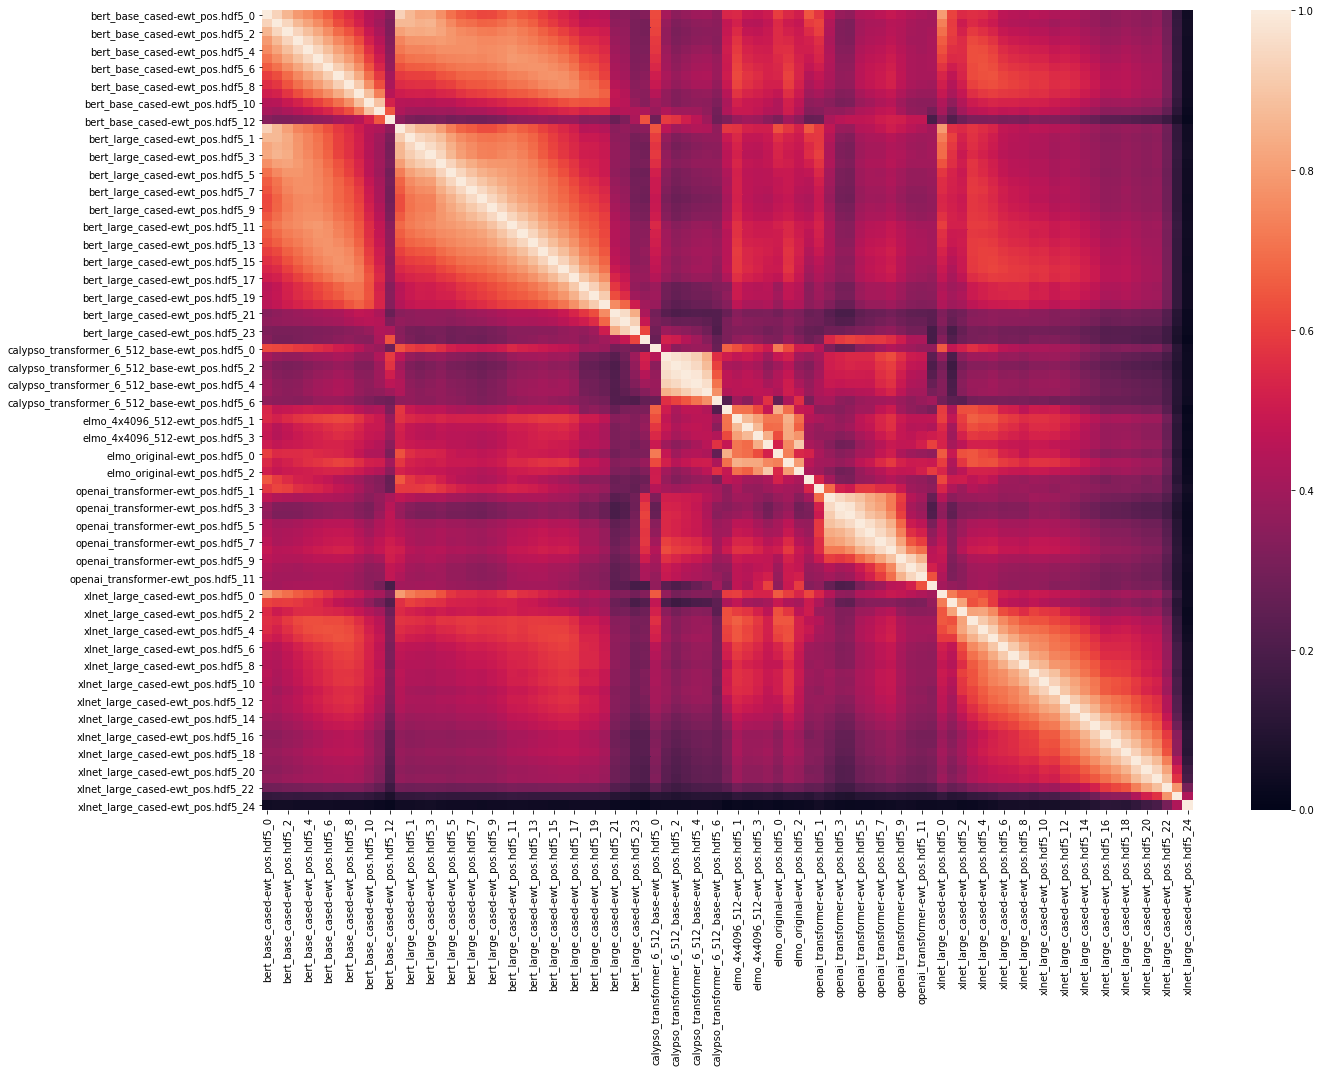

In [53]:
# lincka
fname_prefix = "temp_lincka16_1.00"
fname = "{0}.png".format(fname_prefix)
sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1)
plt.tight_layout()
plt.savefig(fname, transparent=True)

In [26]:
def corrs_update(fl, corr_df, fname_prefix, weights_df=None):
    fname = "{0}{1:.2f}.png".format(fname_prefix, fl)
    try:
        im = plt.imread(fname)
        plt.imshow(im)
    except:
        if weights_df is None: # eg. svcca, don't need to do special division
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else 
                                              t[:int(fl*len(t))].mean())
        else:
            denominator_df = weights_df.applymap(lambda t: float('nan') if type(t) is float else 
                                                             t[:int(fl*len(t))].sum())
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else
                                            t[:int(fl*len(t))].sum())
            df /= denominator_df
        sns.heatmap(df.fillna(1), vmin=0, vmax=1)
        # sns.heatmap(df.fillna(1), )
        plt.tight_layout()
        plt.savefig(fname, transparent=True)
        plt.show()

In [27]:
# interactive updates
def pw_update(fl):
    corrs_update(fl, pw_corrs_df, "temp_pw16_", weights_df=pw_alignments_df)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(pw_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [28]:
# interactive updates
def sv_update(fl):
    corrs_update(fl, sv_corrs_df, "temp_sv16_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(sv_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [29]:
# interactive for maxmincorr
maxmin_corrs = res_d['maxcorr']['corrs']
maxmin_corrs_df = pd.DataFrame(maxmin_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
maxmin_corrs_df = maxmin_corrs_df.reindex(maxmin_corrs_df.columns)
def maxmincorr_update(fl):
    corrs_update(fl, maxmin_corrs_df, "temp_maxmincorr16_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(maxmincorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [30]:
# interactive for linregcorr
linreg_corrs = res_d['maxlinreg']['pred_power']
linreg_corrs_df = pd.DataFrame(linreg_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
linreg_corrs_df = linreg_corrs_df.reindex(linreg_corrs_df.columns)
def linregcorr_update(fl):
    corrs_update(fl, linreg_corrs_df, "temp_linregcorr16_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(linregcorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [31]:
# rbfcka
# sns.heatmap(rbfcka_df.reindex(rbfcka_df.columns).fillna(1), vmin=0, vmax=1)

In [32]:
# comparing models
# use lincka
model1 = "elmo"
model2 = "elmo"
cols = [s for s in lincka_df.columns if s.find(model1) >= 0]
rows = [s for s in lincka_df.columns if s.find(model2) >= 0]

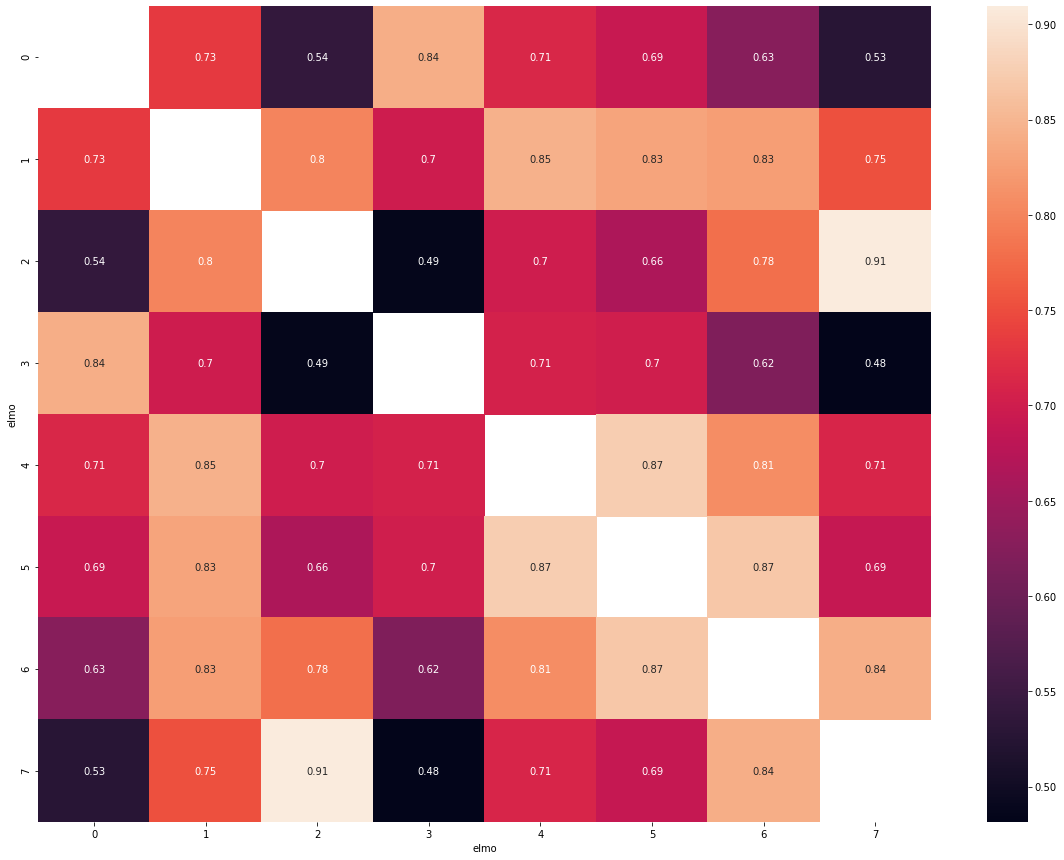

In [33]:
df = lincka_df.loc[rows, cols]

sns.heatmap(df, xticklabels=range(len(df.columns)), yticklabels=range(len(df.index)), annot=True)
plt.xlabel(model1)
plt.ylabel(model2)
plt.show()

# for assets

In [60]:
# construct `displaynum_l`, axis numbers to display
bert_base_idx = [i if i%4==0 else "" for i in range(13)]
bert_large_idx = [i if i%4==0 else "" for i in range(25)]
elmo_transformer_idx = [i if i%3==0 else "" for i in range(7)]
elmo_4_idx = [i if i%2==0 else "" for i in range(5)]
elmo_idx = [i if i%2==0 else "" for i in range(3)]
gpt_idx = [i if i%4==0 else "" for i in range(13)]
xlnet_idx = [i if i%4==0 else "" for i in range(25)]
displaynum_l = bert_base_idx + bert_large_idx + elmo_transformer_idx + elmo_4_idx + elmo_idx + gpt_idx + xlnet_idx

In [103]:
# actually generate
from pandas.core.common import flatten
def mk(fname, df):
    plt.tick_params(axis='both', bottom=False, left=False)
    sns.heatmap(df.fillna(1), vmin=0, vmax=1, xticklabels=displaynum_l, yticklabels=displaynum_l, square=True)
    plt.savefig(fname, transparent=True)
    plt.clf()
# what a hack
heatmap_method_l = list(flatten([meth if meth != "cca" else ["svcca", "pwcca"] for meth in method_l]))
fname_l = [PROJECT_ROOT+"/assets/{0}_ewt_raw.svg".format(method) for method in heatmap_method_l]
df_l = [maxcorr_sim_df, mincorr_sim_df, maxlinreg_sim_df, minlinreg_sim_df, sv_sim_df, pw_sim_df, lincka_df]

for fname, df in zip(fname_l, df_l):
    mk(fname, df)

# Localized vs distributed

In [34]:
locl_meth = "maxcorr"
dist_meth = "cca"

# Localized and distributed dataframes
locl_df = pd.DataFrame(res_d[locl_meth]['similarities'])
locl_df = locl_df.reindex(locl_df.columns)

dist_df = pd.DataFrame(res_d[dist_meth]['sv_similarities'])
dist_df = dist_df.reindex(dist_df.columns)

# Localization and distributivity statistics
locl_ser = locl_df.mean(axis=1)
locl_ser = (locl_ser - locl_ser.mean()) / locl_ser.std()

dist_ser = dist_df.mean(axis=1)
dist_ser = (dist_ser - dist_ser.mean()) / dist_ser.std()

# diff_ser
diff_ser = locl_ser - dist_ser

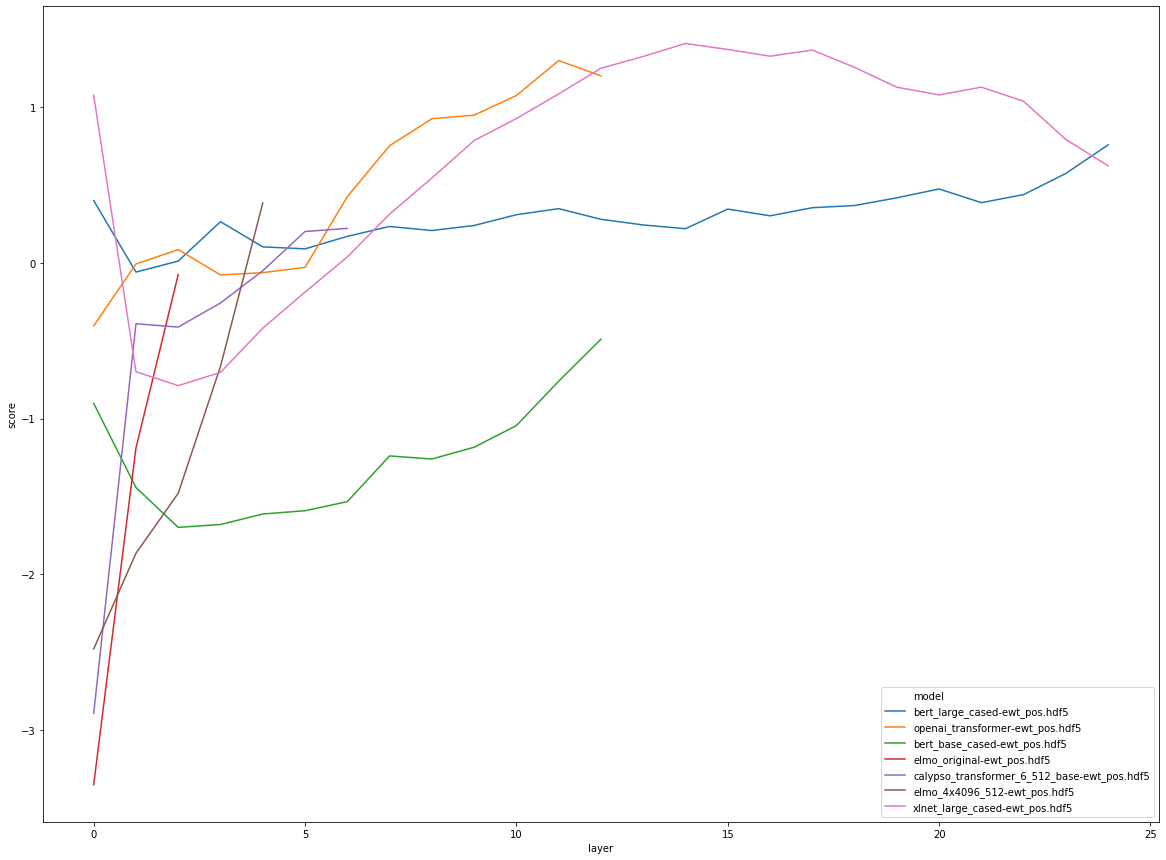

In [35]:
diff_df = pd.DataFrame(diff_ser, columns=['score'])
x = [network_sort_key(layer) for layer in diff_df.index.values]
models, layers = list(zip(*x))
# print(models)
# print(layers)
diff_df['layer'] = layers
diff_df['model'] = models
# diff_df.head()
sns.lineplot(data=diff_df, x='layer', y='score', hue='model')

In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(diff_ser.sort_values())

elmo_original-ewt_pos.hdf5_0                    -3.351951
calypso_transformer_6_512_base-ewt_pos.hdf5_0   -2.894789
elmo_4x4096_512-ewt_pos.hdf5_0                  -2.479833
elmo_4x4096_512-ewt_pos.hdf5_1                  -1.864953
bert_base_cased-ewt_pos.hdf5_2                  -1.698547
bert_base_cased-ewt_pos.hdf5_3                  -1.680127
bert_base_cased-ewt_pos.hdf5_4                  -1.612711
bert_base_cased-ewt_pos.hdf5_5                  -1.591540
bert_base_cased-ewt_pos.hdf5_6                  -1.533304
elmo_4x4096_512-ewt_pos.hdf5_2                  -1.479725
bert_base_cased-ewt_pos.hdf5_1                  -1.442434
bert_base_cased-ewt_pos.hdf5_8                  -1.259486
bert_base_cased-ewt_pos.hdf5_7                  -1.239620
elmo_original-ewt_pos.hdf5_1                    -1.188686
bert_base_cased-ewt_pos.hdf5_9                  -1.183778
bert_base_cased-ewt_pos.hdf5_10                 -1.044575
bert_base_cased-ewt_pos.hdf5_0                  -0.901846
xlnet_large_ca

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(locl_ser.sort_values())

elmo_original-ewt_pos.hdf5_0                    -2.999529
xlnet_large_cased-ewt_pos.hdf5_24               -2.698819
elmo_4x4096_512-ewt_pos.hdf5_0                  -2.530322
elmo_4x4096_512-ewt_pos.hdf5_2                  -2.452429
elmo_4x4096_512-ewt_pos.hdf5_1                  -2.330940
elmo_4x4096_512-ewt_pos.hdf5_3                  -2.131752
elmo_original-ewt_pos.hdf5_2                    -1.971739
elmo_original-ewt_pos.hdf5_1                    -1.901855
elmo_4x4096_512-ewt_pos.hdf5_4                  -1.728781
xlnet_large_cased-ewt_pos.hdf5_23               -1.441689
calypso_transformer_6_512_base-ewt_pos.hdf5_0   -1.384858
openai_transformer-ewt_pos.hdf5_0               -1.285793
calypso_transformer_6_512_base-ewt_pos.hdf5_6   -1.198492
bert_base_cased-ewt_pos.hdf5_12                 -1.033303
bert_large_cased-ewt_pos.hdf5_24                -0.888052
openai_transformer-ewt_pos.hdf5_12              -0.747979
bert_base_cased-ewt_pos.hdf5_11                 -0.672884
xlnet_large_ca

In [38]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(dist_ser.sort_values())

xlnet_large_cased-ewt_pos.hdf5_24               -3.323120
xlnet_large_cased-ewt_pos.hdf5_23               -2.234446
elmo_4x4096_512-ewt_pos.hdf5_4                  -2.113806
openai_transformer-ewt_pos.hdf5_12              -1.950182
elmo_original-ewt_pos.hdf5_2                    -1.897888
xlnet_large_cased-ewt_pos.hdf5_22               -1.670982
bert_large_cased-ewt_pos.hdf5_24                -1.647323
elmo_4x4096_512-ewt_pos.hdf5_3                  -1.467762
calypso_transformer_6_512_base-ewt_pos.hdf5_6   -1.420768
xlnet_large_cased-ewt_pos.hdf5_21               -1.339311
openai_transformer-ewt_pos.hdf5_11              -1.260038
xlnet_large_cased-ewt_pos.hdf5_20               -1.158301
bert_large_cased-ewt_pos.hdf5_23                -1.101817
elmo_4x4096_512-ewt_pos.hdf5_2                  -0.972704
xlnet_large_cased-ewt_pos.hdf5_19               -0.958767
xlnet_large_cased-ewt_pos.hdf5_18               -0.906631
xlnet_large_cased-ewt_pos.hdf5_17               -0.899457
openai_transfo